## Asset Rotation & Allocation

This dataset is perhaps better viewed through a dashboard, please use your login details to acces sit here.

In [1]:
%load_ext autoreload
%autoreload 2

**All Risks**

In [4]:
import sovai as sov
sov.token_auth(token="your_token_here")

In [11]:
df_allocate = sov.data("allocation/all"); df_allocate

,bonds,equities,commodities,dollar,real_estate
date,,,,,
1959-11-30,0.190,0.163,0.176,0.254,0.217
1959-12-31,0.193,0.168,0.184,0.245,0.210
1960-01-31,0.197,0.173,0.187,0.239,0.204
1960-02-29,0.200,0.178,0.190,0.236,0.197
1960-03-31,0.199,0.182,0.192,0.233,0.193
...,...,...,...,...,...
2032-01-31,0.219,0.193,0.194,0.200,0.195
2032-02-29,0.218,0.193,0.195,0.202,0.193
2032-03-31,0.216,0.194,0.196,0.202,0.192


In [12]:
df_past = sov.data("allocation/past"); df_past

,bonds,equities,commodities,dollar,real_estate
date,,,,,
1959-11-30,0.190,0.163,0.176,0.254,0.217
1959-12-31,0.193,0.168,0.184,0.245,0.210
1960-01-31,0.197,0.173,0.187,0.239,0.204
1960-02-29,0.200,0.178,0.190,0.236,0.197
1960-03-31,0.199,0.182,0.192,0.233,0.193
...,...,...,...,...,...
2024-01-31,0.209,0.198,0.186,0.235,0.172
2024-02-29,0.210,0.198,0.185,0.233,0.174
2024-03-31,0.212,0.199,0.184,0.228,0.177


In [13]:
df_future = sov.data("allocation/future"); df_future

a list is returned


,bonds,equities,commodities,dollar,real_estate
date,,,,,
2024-06-30,0.208,0.199,0.190,0.221,0.181
2024-07-31,0.206,0.199,0.192,0.219,0.184
2024-08-31,0.204,0.199,0.193,0.218,0.186
2024-09-30,0.202,0.198,0.193,0.219,0.188
2024-10-31,0.203,0.199,0.192,0.216,0.189
...,...,...,...,...,...
2032-01-31,0.219,0.193,0.194,0.200,0.195
2032-02-29,0.218,0.193,0.195,0.202,0.193
2032-03-31,0.216,0.194,0.196,0.202,0.192


In [14]:
df_returns = sov.data("allocation/returns"); df_returns

a list is returned


,bonds,equities,commodities,dollar,real_estate
date,,,,,
1959-06-30,0.074,-0.333,-0.505,1.022,0.727
1959-07-31,-0.276,-0.992,0.144,0.578,0.311
1959-08-31,0.057,-0.818,-0.104,0.430,0.675
1959-09-30,0.771,-0.234,-0.160,0.750,-0.563
1959-10-31,0.337,0.126,0.064,0.233,-0.151
...,...,...,...,...,...
2032-01-31,-0.012,-1.105,-0.499,0.318,-0.801
2032-02-29,-0.160,-0.080,0.299,0.122,-0.559
2032-03-31,-0.137,0.232,0.119,0.143,-0.121


In [42]:
df_melt["Value"] - 0.2

,date,Category,Value
0,1959-11-30,bonds,0.190
1,1959-12-31,bonds,0.193
2,1960-01-31,bonds,0.197
3,1960-02-29,bonds,0.200
4,1960-03-31,bonds,0.199
...,...,...,...
4350,2032-01-31,real_estate,0.195
4351,2032-02-29,real_estate,0.193
4352,2032-03-31,real_estate,0.192
4353,2032-04-30,real_estate,0.192


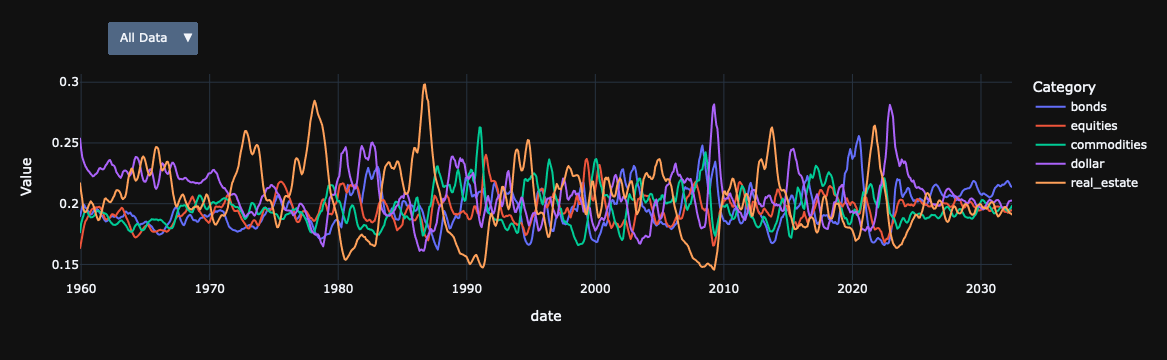

In [58]:
import pandas as pd
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go

df_allocation_new = df_allocate.copy()

# Current date
today = datetime.now()

df_melt = df_allocation_new.reset_index().melt(id_vars='date', var_name='Category', value_name='Value')

# Create the initial figure
fig = px.line(df_melt, x='date', y='Value', color='Category')

# Create the layout with buttons and date range slider
layout = go.Layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="All Data",
                     method="update",
                     args=[{"visible": [True] * len(fig.data)},
                           {"xaxis": {"range": [df_melt['date'].min(), df_melt['date'].max()]},
                            "yaxis": {"range": [df_melt['Value'].min(), df_melt['Value'].max()]}}]),
                dict(label="Past",
                     method="update",
                     args=[{"visible": [True] * len(fig.data)},
                           {"xaxis": {"range": [today - timedelta(days=365*50), today]},
                            "yaxis": {"range": [df_melt[(df_melt['date'] >= today - timedelta(days=365*50)) & (df_melt['date'] <= today)]['Value'].min(),
                                                df_melt[(df_melt['date'] >= today - timedelta(days=365*50)) & (df_melt['date'] <= today)]['Value'].max()]}}]),
                dict(label="Present",
                     method="update",
                     args=[{"visible": [True] * len(fig.data)},
                           {"xaxis": {"range": [today - timedelta(days=365*2), today + timedelta(days=365*2)]},
                            "yaxis": {"range": [df_melt[(df_melt['date'] >= today - timedelta(days=365*2)) & (df_melt['date'] <= today + timedelta(days=365*2))]['Value'].min(),
                                                df_melt[(df_melt['date'] >= today - timedelta(days=365*2)) & (df_melt['date'] <= today + timedelta(days=365*2))]['Value'].max()]}}]),
                dict(label="Future",
                     method="update",
                     args=[{"visible": [True] * len(fig.data)},
                           {"xaxis": {"range": [today, df_melt['date'].max()]},
                            "yaxis": {"range": [df_melt[(df_melt['date'] >= today)]['Value'].min(),
                                                df_melt[(df_melt['date'] >= today)]['Value'].max()]}}])
            ],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.03,
            xanchor="left",
            y=1.3,
            yanchor="top"
        )
    ]
)

# Update the figure layout
fig.update_layout(layout)

fig.show()

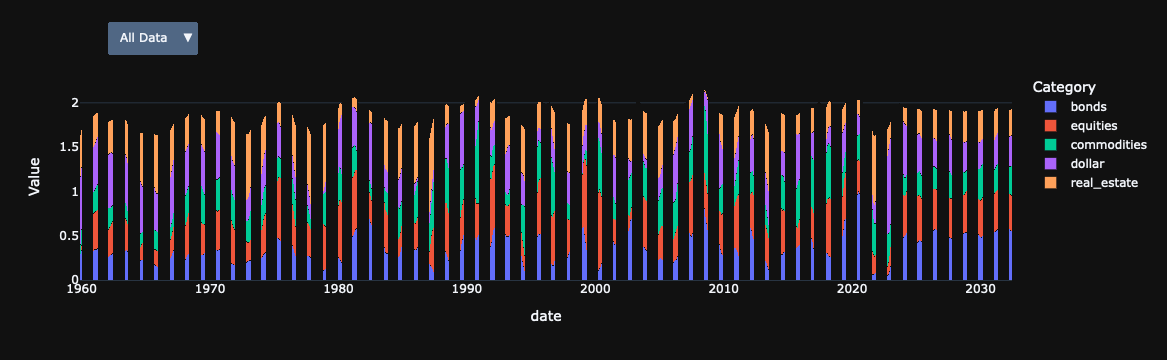

In [55]:
import pandas as pd
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go

df_allocation_new = df_allocate.copy()

# Deduct 0.2 from all the columns
df_allocation_new = df_allocation_new - 0.2

# Perform 0-1 normalization
df_allocation_normalized = (df_allocation_new - df_allocation_new.min()) / (df_allocation_new.max() - df_allocation_new.min())

# Current date
today = datetime.now()

df_melt = df_allocation_normalized.reset_index().melt(id_vars='date', var_name='Category', value_name='Value')

# Create the initial figure
fig = px.bar(df_melt, x='date', y='Value', color='Category', barmode='stack')

# Create the layout with buttons and date range slider
layout = go.Layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="All Data",
                     method="update",
                     args=[{"visible": [True] * len(fig.data)},
                           {"xaxis": {"range": [df_melt['date'].min(), df_melt['date'].max()]}}]),
                dict(label="Past",
                     method="update",
                     args=[{"visible": [True] * len(fig.data)},
                           {"xaxis": {"range": [today - timedelta(days=365*50), today]}}]),
                dict(label="Present",
                     method="update",
                     args=[{"visible": [True] * len(fig.data)},
                           {"xaxis": {"range": [today - timedelta(days=365*2), today + timedelta(days=365*2)]}}]),
                dict(label="Future",
                     method="update",
                     args=[{"visible": [True] * len(fig.data)},
                           {"xaxis": {"range": [today, today + timedelta(days=365*2)]}}])
            ],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.03,
            xanchor="left",
            y=1.3,
            yanchor="top"
        )
    ],
)

# Update the figure layout
fig.update_layout(layout)

fig.show()